<a href="https://colab.research.google.com/github/nujudaly/T5/blob/main/Nujud_of_Clustering_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Load the Data

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Twaiq/Traffic_Accidents.csv")

In [ ]:
df.head()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,88245,2.01E+12,381880.0,298700.0,-2.268891,52.585773,21,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01029654,2005.0
1,78422,200520D303703,413520.0,284740.0,-1.802453,52.460412,20,2,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009313,2005.0
2,19574,200501TX20137,516260.0,177370.0,-0.327073,51.483290,1,3,2.0,2,...,454.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01002678,2005.0
3,79337,200520E097001,401530.0,282610.0,-1.978930,52.441426,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,No,E01008924,2005.0
4,89121,2.01E+12,421760.0,320680.0,-1.678823,52.783240,21,3,1.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,2.0,Yes,E01029416,2005.0


In [ ]:
df.tail()

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
51995,58660,200511DJ27240,427910.0,515740.0,-1.570167,54.536179,11,3,2.0,1,...,55.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012363,2005.0
51996,101443,20053102C2156,450720.0,340010.0,-1.246470,52.955054,31,3,1.0,1,...,6002.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01028141,2005.0
51997,437,200501BS70452,526580.0,177540.0,-0.178465,51.482604,1,3,1.0,1,...,0.0,None within 50 metres,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01002840,2005.0
51998,61353,2.01E+12,426800.0,463700.0,-1.591972,54.068547,12,3,2.0,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,E01027681,2005.0
51999,75359,2005160D02810,509970.0,428420.0,-0.334114,53.740566,16,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01012853,2005.0


In [ ]:
df.sample(5)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
4403,31154,200504CL05062,352860.0,424380.0,-2.715739,53.713693,4,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,E01025420,2005.0
7363,75356,2005160D02780,511640.0,430320.0,-0.308120,53.757281,16,2,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,E01012807,2005.0
6572,68145,2.01E+12,406040.0,441510.0,-1.909630,53.869764,13,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,E01010728,2005.0
42000,80179,200520F029301,407320.0,287230.0,-1.893650,52.482914,20,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01009191,2005.0
9758,31937,200504DF05191,354970.0,432970.0,-2.685026,53.791083,4,3,2.0,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,E01025253,2005.0


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 30 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Unnamed: 0                                   52000 non-null  int64  
 1   Accident_Index                               52000 non-null  object 
 2   Location_Easting_OSGR                        52000 non-null  float64
 3   Location_Northing_OSGR                       52000 non-null  float64
 4   Longitude                                    52000 non-null  float64
 5   Latitude                                     52000 non-null  float64
 6   Police_Force                                 52000 non-null  int64  
 7   Accident_Severity                            52000 non-null  int64  
 8   Number_of_Vehicles                           51198 non-null  float64
 9   Number_of_Casualties                         52000 non-null  int64  
 10



*  Here we notice that the Year column is a float which is not a standard so it is
better to be converted to integer.
* The number of vehicles is also a float which is not reasonable.


*  The Date column is an object which is not a standard.
* Day_of_week column is a float which is not a standard.


*   Time column is an object which is not a standard.
*   Did_Police_Officer_Attend_Scene_of_Accident can be coverted numerically to 0 and 1.


So, these are the few changes that should be addressed.

In [ ]:
df['Year'].dropna()

,Year
0,2005.0
1,2005.0
2,2005.0
3,2005.0
4,2005.0
...,...
51995,2005.0
51996,2005.0
51997,2005.0
51998,2005.0


In [ ]:

df['Year'].fillna(0, inplace=True)


In [ ]:
df['Year'] = df['Year'].astype('int64')

In [ ]:
df['Number_of_Vehicles'].fillna(0, inplace=True)


In [ ]:
df['Number_of_Vehicles'] = df['Number_of_Vehicles'].astype('int64')

In [ ]:
df['Date'][365]

'30/05/2005'

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y', errors='coerce')

In [ ]:
df['Date'].fillna('Unknown', inplace=True)

<ipython-input-15-0db933b1385b>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Unknown' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df['Date'].fillna('Unknown', inplace=True)


In [ ]:
df['Day_of_Week'].fillna(0, inplace=True)


In [ ]:
df['Day_of_Week'] = df['Day_of_Week'].astype('int64')

In [ ]:
df['Day_of_Week']

,Day_of_Week
0,1
1,7
2,7
3,5
4,3
...,...
51995,5
51996,4
51997,2
51998,1


In [ ]:
df['Time']

,Time
0,16:39
1,14:25
2,10:20
3,21:30
4,00:50
...,...
51995,11:40
51996,09:05
51997,10:25
51998,17:40


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M', errors='coerce').dt.time

In [ ]:
df['Time']

,Time
0,16:39:00
1,14:25:00
2,10:20:00
3,21:30:00
4,00:50:00
...,...
51995,11:40:00
51996,09:05:00
51997,10:25:00
51998,17:40:00


**Now the data types are much cleaner than before**

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [ ]:
df.describe()

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,52000.000000,51999.000000,51999.000000,51999.000000,50959.000000,51999.000000,51999.000000,51999.000000,52000.000000
mean,52309.605596,439654.064615,338794.330769,-1.425829,52.940991,11.101904,2.848481,1.814635,1.358615,4.077462,155.142060,4.084155,1025.653859,36.768971,2.933383,340.922479,1.249736,2004.961442
std,30282.566278,66711.811588,115731.113185,0.975537,1.044812,9.558172,0.390890,0.738460,0.804162,1.968687,114.153616,1.415258,1882.560604,12.707643,3.138719,1205.580339,0.432953,8.792507
min,0.000000,296780.000000,156110.000000,-3.596752,51.289060,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,0.000000
25%,25924.750000,388110.000000,194160.000000,-2.179555,51.630849,1.000000,3.000000,1.000000,1.000000,2.000000,32.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2005.000000
50%,52285.500000,429505.000000,361950.000000,-1.552874,53.149640,10.000000,3.000000,2.000000,1.000000,4.000000,142.000000,3.000000,74.000000,30.000000,4.000000,0.000000,1.000000,2005.000000
75%,78552.250000,516010.000000,415952.500000,-0.312861,53.638514,20.000000,3.000000,2.000000,1.000000,6.000000,254.000000,6.000000,642.000000,40.000000,6.000000,0.000000,1.000000,2005.000000
max,104949.000000,559570.000000,656390.000000,0.350177,55.800830,48.000000,3.000000,18.000000,23.000000,7.000000,570.000000,6.000000,9999.000000,70.000000,6.000000,9711.000000,3.000000,2005.000000


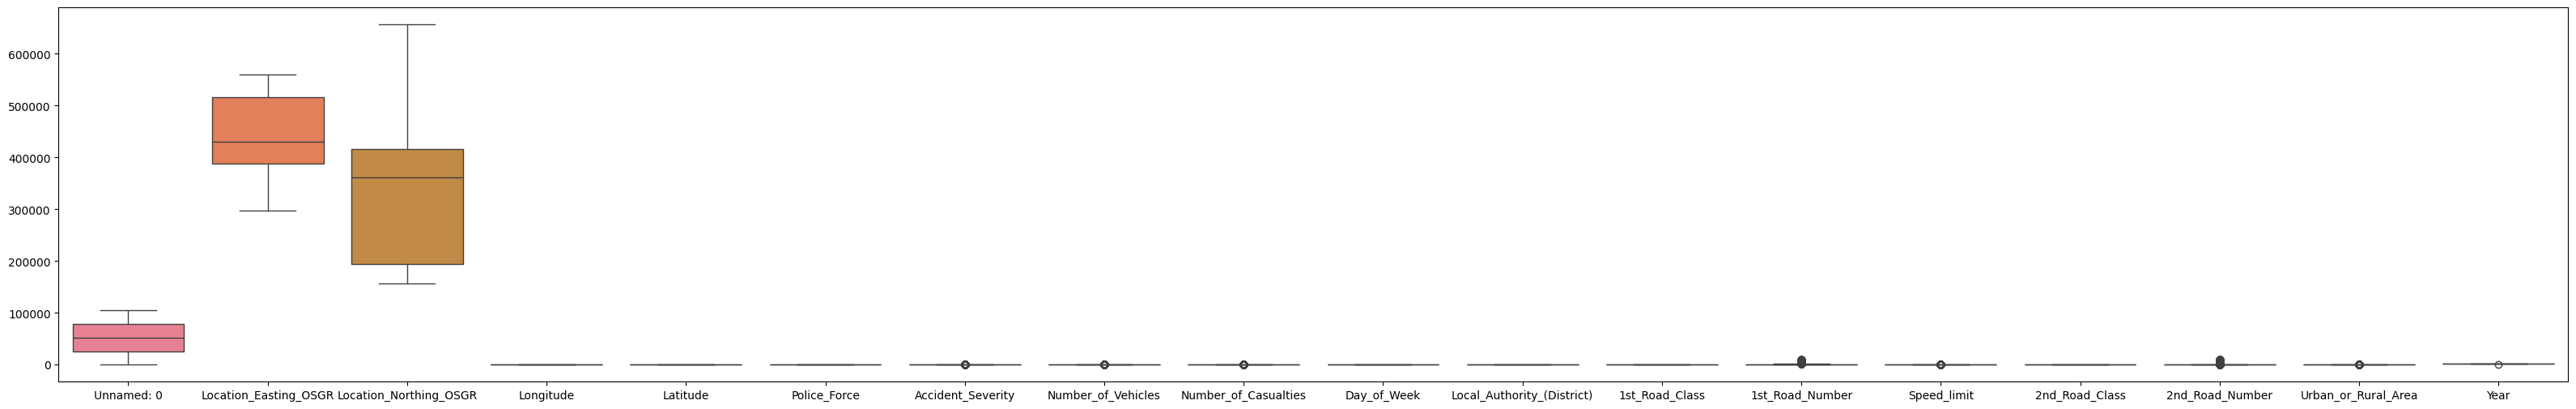

In [ ]:

data = df
plt.figure(figsize=(40,6))
sns.boxplot(data=data)
plt.show()


In [ ]:
df[['Unnamed: 0', 'Location_Easting_OSGR', 'Location_Northing_OSGR']]

,Unnamed: 0,Location_Easting_OSGR,Location_Northing_OSGR
0,88245,381880.0,298700.0
1,78422,413520.0,284740.0
2,19574,516260.0,177370.0
3,79337,401530.0,282610.0
4,89121,421760.0,320680.0
...,...,...,...
51995,58660,427910.0,515740.0
51996,101443,450720.0,340010.0
51997,437,526580.0,177540.0
51998,61353,426800.0,463700.0


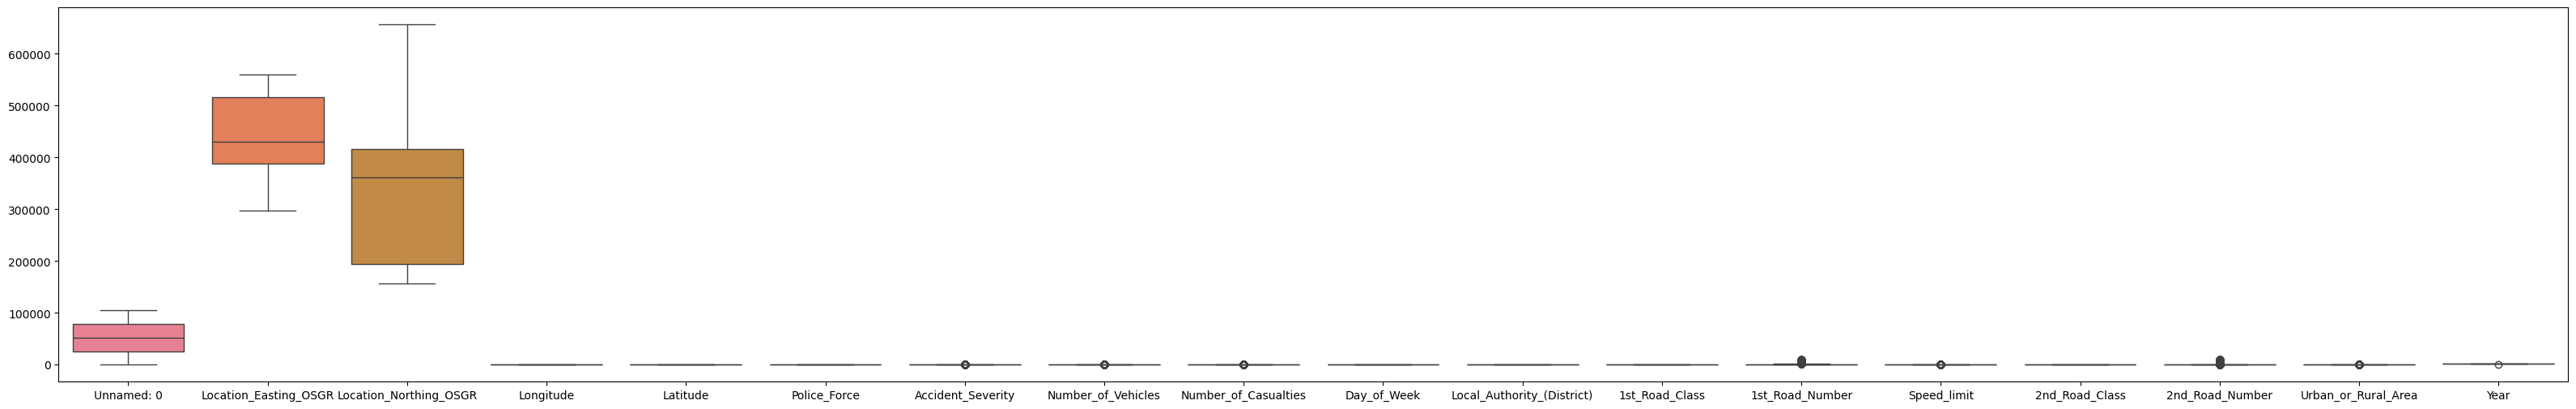

In [ ]:
Q1 = df[['Location_Easting_OSGR', 'Location_Northing_OSGR']].quantile(0.25)
Q3 = df[['Location_Easting_OSGR', 'Location_Northing_OSGR']].quantile(0.75)

# IQR
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_filtered = df[~((df[['Location_Easting_OSGR', 'Location_Northing_OSGR']] < lower_bound) |
                   (df[['Location_Easting_OSGR', 'Location_Northing_OSGR']] > upper_bound)).any(axis=1)]

plt.figure(figsize=(40,6))
sns.boxplot(data=df_filtered)
plt.show()


In [ ]:
df.isna().sum()

,0
Unnamed: 0,0
Accident_Index,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0


In [ ]:
#Impute missing data
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
df['Speed_limit'] = imputer.fit_transform(df[['Speed_limit']])

df['LSOA_of_Accident_Location'] = df['LSOA_of_Accident_Location'].mode()[0]
df['LSOA_of_Accident_Location'].fillna(df['LSOA_of_Accident_Location'], inplace=True)

for column in ['1st_Road_Number', 'Road_Type', 'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)', '1st_Road_Class', '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control', 'Pedestrian_Crossing-Physical_Facilities', '2nd_Road_Number', 'Light_Conditions', 'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident']:
    mode_value = df[column].mode()[0]
    df[column].fillna(mode_value, inplace=True)



In [ ]:
#Scale the data
from sklearn.preprocessing import StandardScaler

data = df[['Unnamed: 0',	'Location_Easting_OSGR', 	'Location_Northing_OSGR', 	'Longitude', 	'Latitude', 	'Police_Force',	'Accident_Severity', 	'Number_of_Vehicles',	'Number_of_Casualties',	'Day_of_Week', 	'Local_Authority_(District)', 	'1st_Road_Class', 	'1st_Road_Number', 	'Speed_limit', 	'2nd_Road_Class', 	'2nd_Road_Number' ,	'Urban_or_Rural_Area', 	'Year']]

scaler = StandardScaler()

scaler.fit(data)

StandardScaler()

In [ ]:
# Reduce dimentions using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data)

data_pca



array([[  -9414.25377548,   71867.10433705],
       [ -35875.98738703,   48074.00324044],
       [-181084.09849446,   -5887.2713603 ],
       ...,
       [-187107.26228689,  -16876.22188077],
       [ 119717.67696445,  -38933.03474602],
       [  55680.18899884,  -98801.523427  ]])

In [ ]:
# Implement One-Hot Encoding for nominal categorical variables.
# Did_Police_Officer_Attend_Scene_of_Accident can be coverted numerically to 0 and 1.
# Road_Surface_Conditions can be coverted numerically.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['Did_Police_Officer_Attend_Scene_of_Accident'] = label_encoder.fit_transform(df['Did_Police_Officer_Attend_Scene_of_Accident'])

df['Road_Surface_Conditions'] = label_encoder.fit_transform(df['Road_Surface_Conditions'])

In [ ]:
df.sample(10)

,Unnamed: 0,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,...,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
10856,78050,200520D215203,409440.0,285340.0,-1.862485,52.465891,20,3,2,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,0,1.0,1,E01000004,2005
7999,7328,200501JI40255,543450.0,186340.0,0.067908,51.557655,1,3,2,1,...,118.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,0,1.0,1,E01000004,2005
19643,10180,200501LX50471,532950.0,171890.0,-0.088903,51.430369,1,3,1,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,0,1.0,1,E01000004,2005
50779,15832,200501RG49132,542870.0,174560.0,0.054778,51.451949,1,3,1,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,5,1.0,1,E01000004,2005
37565,104407,200532C514405,539730.0,346280.0,0.080531,52.995603,32,3,1,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,0,2.0,1,E01000004,2005
35628,101787,20053102C3458,457270.0,340330.0,-1.148925,52.957272,31,3,1,1,...,0.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Unknown,3,1.0,0,E01000004,2005
38214,99650,20053102A2353,453610.0,348960.0,-1.201974,53.035221,31,3,2,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,5,1.0,1,E01000004,2005
24537,88334,2.01E+12,398890.0,308800.0,-2.017864,52.676875,21,3,2,1,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,5,1.0,1,E01000004,2005
22173,60294,2.01E+12,429670.0,455350.0,-1.548931,53.993345,12,2,2,2,...,0.0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,0,1.0,1,E01000004,2005
35871,16866,200501SX20505,522390.0,190580.0,-0.234245,51.600720,1,3,2,2,...,1.0,None within 50 metres,Pedestrian phase at traffic signal junction,Daylight: Street light present,Fine without high winds,0,1.0,1,E01000004,2005


## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
#Explain your choice of features.

# Select relevant features for clustering
features = df[['Longitude', 'Latitude', 'Accident_Severity', 'Number_of_Vehicles', 'Number_of_Casualties',
                'Speed_limit', 'Urban_or_Rural_Area', 'Road_Surface_Conditions']]

# Explanation for feature selection:
# Where it happened (Longitude and Latitude): This tells us the spot on the map where the accident went down, which is pretty much what we care about.
# How bad it was (Accident Severity): Shows if it was a little ok or something much worse.
# How many cars and people (Number of Vehicles and Casualties): Tells us how many cars crashed and how many people got hurt, so we know how big the mess was.
# (Speed Limit): Helps us guess if people might have been going too fast, which could be why the crash happened.
# (Urban or Rural Area): Says if the crash was in a busy city or out in the middle of nowhere, which can make a difference.
# What the road was like (Road Surface Conditions): Tells us if the road was slippery or something, which might have caused the crash or made it worse.


## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

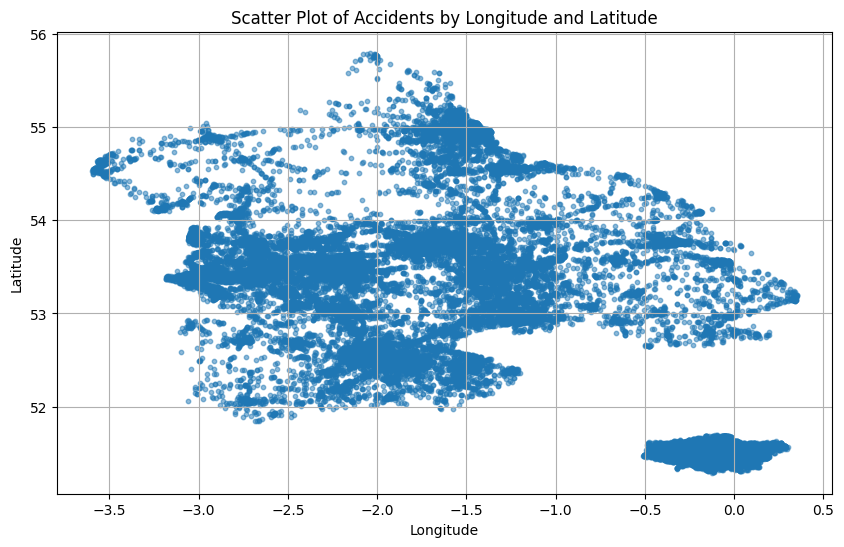

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], s=10, alpha=0.5)
plt.title('Scatter Plot of Accidents by Longitude and Latitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

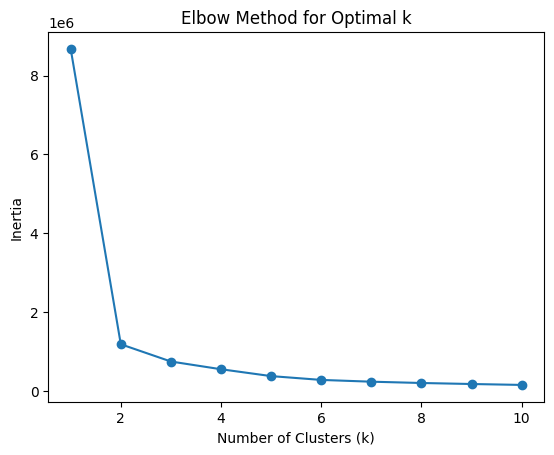

In [ ]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(features)
    inertia.append(kmeans.inertia_)

# Plot the elbow method graph
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

In [ ]:
#Train the model
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [ ]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(features, kmeans.labels_)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8092730015298416


## Plot the data points with their predicted cluster center

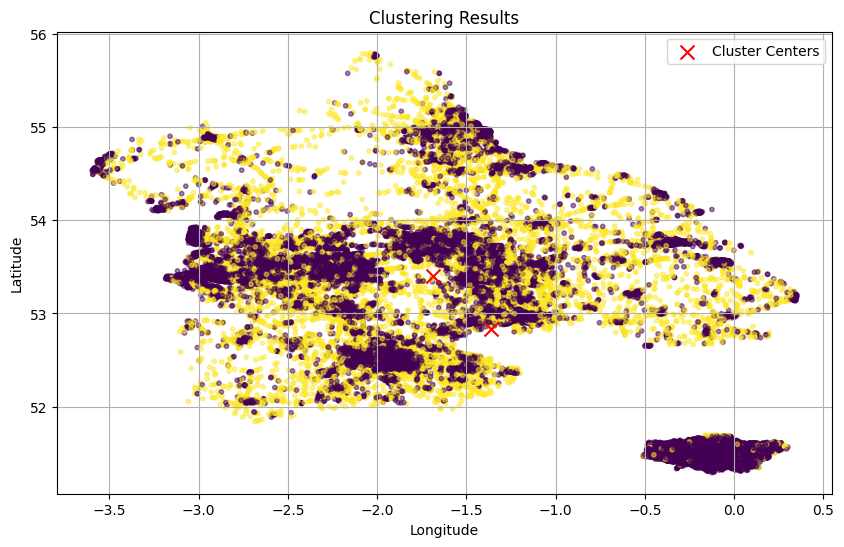

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Longitude'], df['Latitude'], c=kmeans.labels_, cmap='viridis', s=10, alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Cluster Centers')
plt.title('Clustering Results')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.grid(True)
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
Where it happened (Longitude and Latitude): This tells us the spot on the map where the accident went down, which is pretty much what we care about.
How bad it was (Accident Severity): Shows if it was a little ok or something much worse.
How many cars and people (Number of Vehicles and Casualties): Tells us how many cars crashed and how many people got hurt, so we know how big the mess was.
(Speed Limit): Helps us guess if people might have been going too fast, which could be why the crash happened.
(Urban or Rural Area): Says if the crash was in a busy city or out in the middle of nowhere, which can make a difference.
What the road was like (Road Surface Conditions): Tells us if the road was slippery or something, which might have caused the crash or made it worse.

* **Number of Clusters Choices:**
   - How did you determine the optimal number?
   Using the Elbow method and experminting with number of Ks
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   The code uses the Silhouette Score to see how well the clusters are separated.  
   - How do these metrics help in understanding the effectiveness of your clustering approach?
   A higher score means better clusters.
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?
    working more with the outilers method to improve the quality of the data.
    using (DBSCAN) to identify clusters with nosies at more complex shapes and handle noise better than K-Means.
    Explore Hierarchical Clustering